# Fall Accidents: Statistical Relationship Analysis

In [32]:
# Import standard data analysis and statistical libraries

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest
from os import path
import csv
import seaborn as sns
import numpy as np

In [ ]:
# Define the path to the CSV file
file_path = path.join('..', 'data', 'classifier', 'classified_occupations_and_mechanisms.csv')
# Load the DataFrame from the file
classified_occupations_and_mechanisms = pd.read_csv(file_path, sep=',')

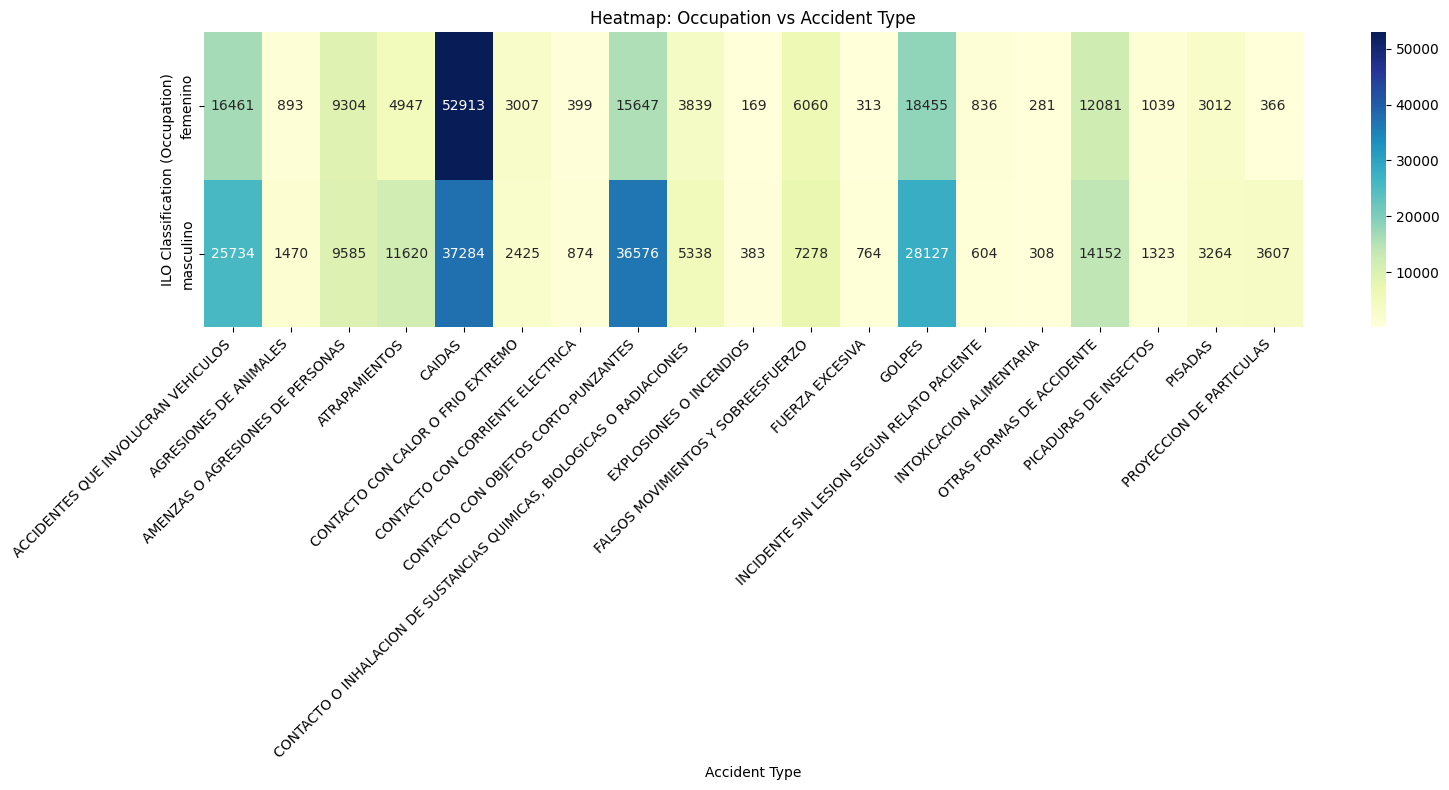

In [37]:
# Create a contingency table
contingency_table = pd.crosstab(classified_occupations_and_mechanisms['sexo'], classified_occupations_and_mechanisms['desc_subforma'])

# Plot heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")

plt.title("Heatmap: Occupation vs Accident Type")
plt.xlabel("Accident Type")
plt.ylabel("ILO Classification (Occupation)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## How significant is the relationship between sex and type of mechanism ?

In [38]:
# Create contingency table
tabla = pd.crosstab(classified_occupations_and_mechanisms['sexo'], classified_occupations_and_mechanisms['desc_subforma'])

# Chi-square test
chi2, p, _, _ = chi2_contingency(tabla)
print(f"Chi-cuadrado: {chi2:.2f}, p-valor: {p:.4f}")

# Function to calculate Cramér's V
def cramers_v(tabla):
    chi2 = chi2_contingency(tabla)[0]
    n = tabla.to_numpy().sum()
    r, k = tabla.shape
    return np.sqrt(chi2 / (n * (min(k-1, r-1))))

print(f"Cramér's V: {cramers_v(tabla):.3f}")


Chi-cuadrado: 17116.52, p-valor: 0.0000
Cramér's V: 0.224


## What is the strength of the association between occupation and falls?

In [39]:
# Create binary variable: 1 if fall occurred, 0 otherwise
classified_occupations_and_mechanisms['es_caida'] = (classified_occupations_and_mechanisms['desc_subforma'] == 'CAIDAS').astype(int)

# Contingency table: occupation vs falls
tabla_occ = pd.crosstab(classified_occupations_and_mechanisms['ocupacion'], classified_occupations_and_mechanisms['es_caida'])

# Chi-square test
chi2, p, _, _ = chi2_contingency(tabla_occ)
print(f"Chi-cuadrado: {chi2:.2f}, p-valor: {p:.4f}")

# Calculate Cramér's V
print(f"Cramér's V: {cramers_v(tabla_occ):.3f}")

Chi-cuadrado: 58475.75, p-valor: 0.0000
Cramér's V: 0.414


## How significant is the fact that falls are more concentrated among women?

In [40]:
# Total accidents by sex
total_por_sexo = classified_occupations_and_mechanisms['sexo'].value_counts()

# Total falls by sex
caidas_por_sexo = classified_occupations_and_mechanisms[classified_occupations_and_mechanisms['desc_subforma'] == 'CAIDAS']['sexo'].value_counts()

# Ensure order matches between counts (e.g., Male, Female)
count = caidas_por_sexo.reindex(total_por_sexo.index).fillna(0).astype(int).values
nobs = total_por_sexo.values

# Proportions Z-test
zstat, pval = proportions_ztest(count, nobs)
print(f"Z = {zstat:.2f}, p-valor = {pval:.4f}")

Z = -103.26, p-valor = 0.0000
